# **Name** - Manu Mathew
# **StudentID** - 8990691

**Objective** - The primary objective of the Lab is to build and compare image classification model that can accurately distinguish the images of cats and dogs. In this notebook, 
- We first prepare a manageable dataset of 5000 images where 2500 images are of dogs and 2500 images are of cats.
- Then we perform the exploratory data analysis (EDA) to understand the dataset characteristics and identify data quality issues.
- Train and evaluate two deep learning models:
    - A custom-defined Convolutional Neural Network (CNN).
    - A fine-tuned VGG16 model pre-trained on ImageNet.
- Explore the relative performance of the models.

`Approach`: 
- Data:
    Use 5000 images from Kaggle and organize them into train/test folders.

- Preprocessing:
    Resize images, normalize pixel values, apply data augmentation, and split into train/validation/test sets.

- EDA:
    Visualize sample images, check class distribution, and analyze pixel intensity.

- Model 1 - Custom CNN:
    Build and train a basic CNN with conv, pooling, and dense layers using binary classification.

- Model 2 - Fine-Tune VGG16:
    Load pre-trained VGG16 (without top), freeze base, add custom top layers, and train with the same data.

- Evaluation:
    Compare both models using accuracy, confusion matrix, precision, recall, F1-score, and PR curve.

- Error Analysis:
    Show and review misclassified images to find patterns in errors.

- Conclusion:
    Summarize which model performed better and suggest possible improvements.

## **Import the dependencies**

In [12]:
import os, shutil, pathlib
import pathlib
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

## **Obtain the dataset**

In the below block of code , we have the original set of images 25000 in the train folder. Create a small dataset of 1000 training images, 500 validation images and 1000 test images per class. This reduces the dataset from 25,000 images to 5000.

In [ ]:
# orginal_dir is the directory where the original dataset is stored.
original_dir = pathlib.Path("./data/train")
# new_base_dir is the directory where the new dataset structure will be created.
# It will contain subdirectories for train, validation, and test sets.
new_base_dir = pathlib.Path("./data/kaggle_dogs_vs_cats_small")

# Create the new base directory if it doesn't exist
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# Create train, validation, and test subsets
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

## **EDA: Explore the data with relevant graphs, statistics and insights** 

In [ ]:
# Set the path to the  dataset
data_folder = pathlib.Path('./data/kaggle_dogs_vs_cats_small')

In [8]:
# Load the datasets using image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
type(train_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

### **Displaying the shapes of the data and labels yielded by the `Dataset`:**

In [10]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [11]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int32)>

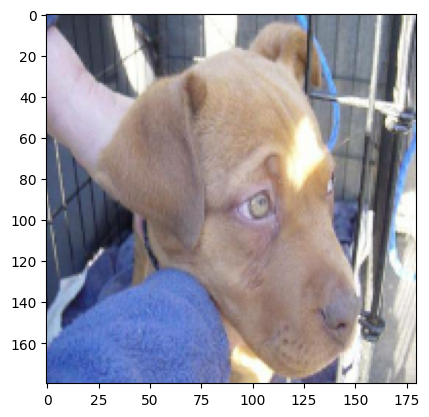

In [13]:
plt.imshow(data_batch[0].numpy().astype("uint8"))